# KNN ML Algo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('Coded_Data.csv')

In [3]:
df

Unnamed: 0  Cd_1  Cd_2  Cd_3  Cd_4  Cd_5  Cd_6  Cd_7  Cd_8  Cd_9  Cd_10  \
0             1  53.1  63.4  33.0  46.2  47.3  21.2  44.3  36.1  46.6   65.0   
1             2  36.9  54.7  31.1  50.5  56.0  38.9  39.4  56.8  33.0   78.8   
2             3  41.9  65.5  53.5  52.3  92.5  43.2  94.9  64.7  50.8   67.9   
3             4  71.7  75.6  37.9  50.5  69.2  52.5  82.3  77.3  80.8   60.9   
4             5  74.3  51.8  36.4  40.9  74.7  42.2  65.1  36.2  77.6   74.9   
..          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
995         996  58.7  56.4  49.5  38.1  62.8  35.2  43.6  17.9  59.3   71.2   
996         997  33.4  52.1  54.7  48.5  85.7  76.2  61.6  40.0  50.8   87.8   
997         998  66.0  53.6  45.4  56.1  54.6  53.1  22.6  21.8  48.8   73.2   
998         999  63.0  47.0  23.6  40.7  97.5  56.6  50.0  59.4  67.7   62.7   
999        1000  48.6  52.4  24.2  48.9  56.6  25.5  45.4  50.9  66.7   72.1   

    Result  
0        Y  
1        N  
2        N  
3        Y  
4        Y  
..     ...  
995      Y  
996      N  
997      Y  
998      Y  
999      Y  

[1000 rows x 12 columns]

In [4]:
#first column looks like index 
df =pd.read_csv('Coded_Data.csv',index_col=0)
df.head()

Cd_1  Cd_2  Cd_3  Cd_4  Cd_5  Cd_6  Cd_7  Cd_8  Cd_9  Cd_10 Result
1  53.1  63.4  33.0  46.2  47.3  21.2  44.3  36.1  46.6   65.0      Y
2  36.9  54.7  31.1  50.5  56.0  38.9  39.4  56.8  33.0   78.8      N
3  41.9  65.5  53.5  52.3  92.5  43.2  94.9  64.7  50.8   67.9      N
4  71.7  75.6  37.9  50.5  69.2  52.5  82.3  77.3  80.8   60.9      Y
5  74.3  51.8  36.4  40.9  74.7  42.2  65.1  36.2  77.6   74.9      Y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


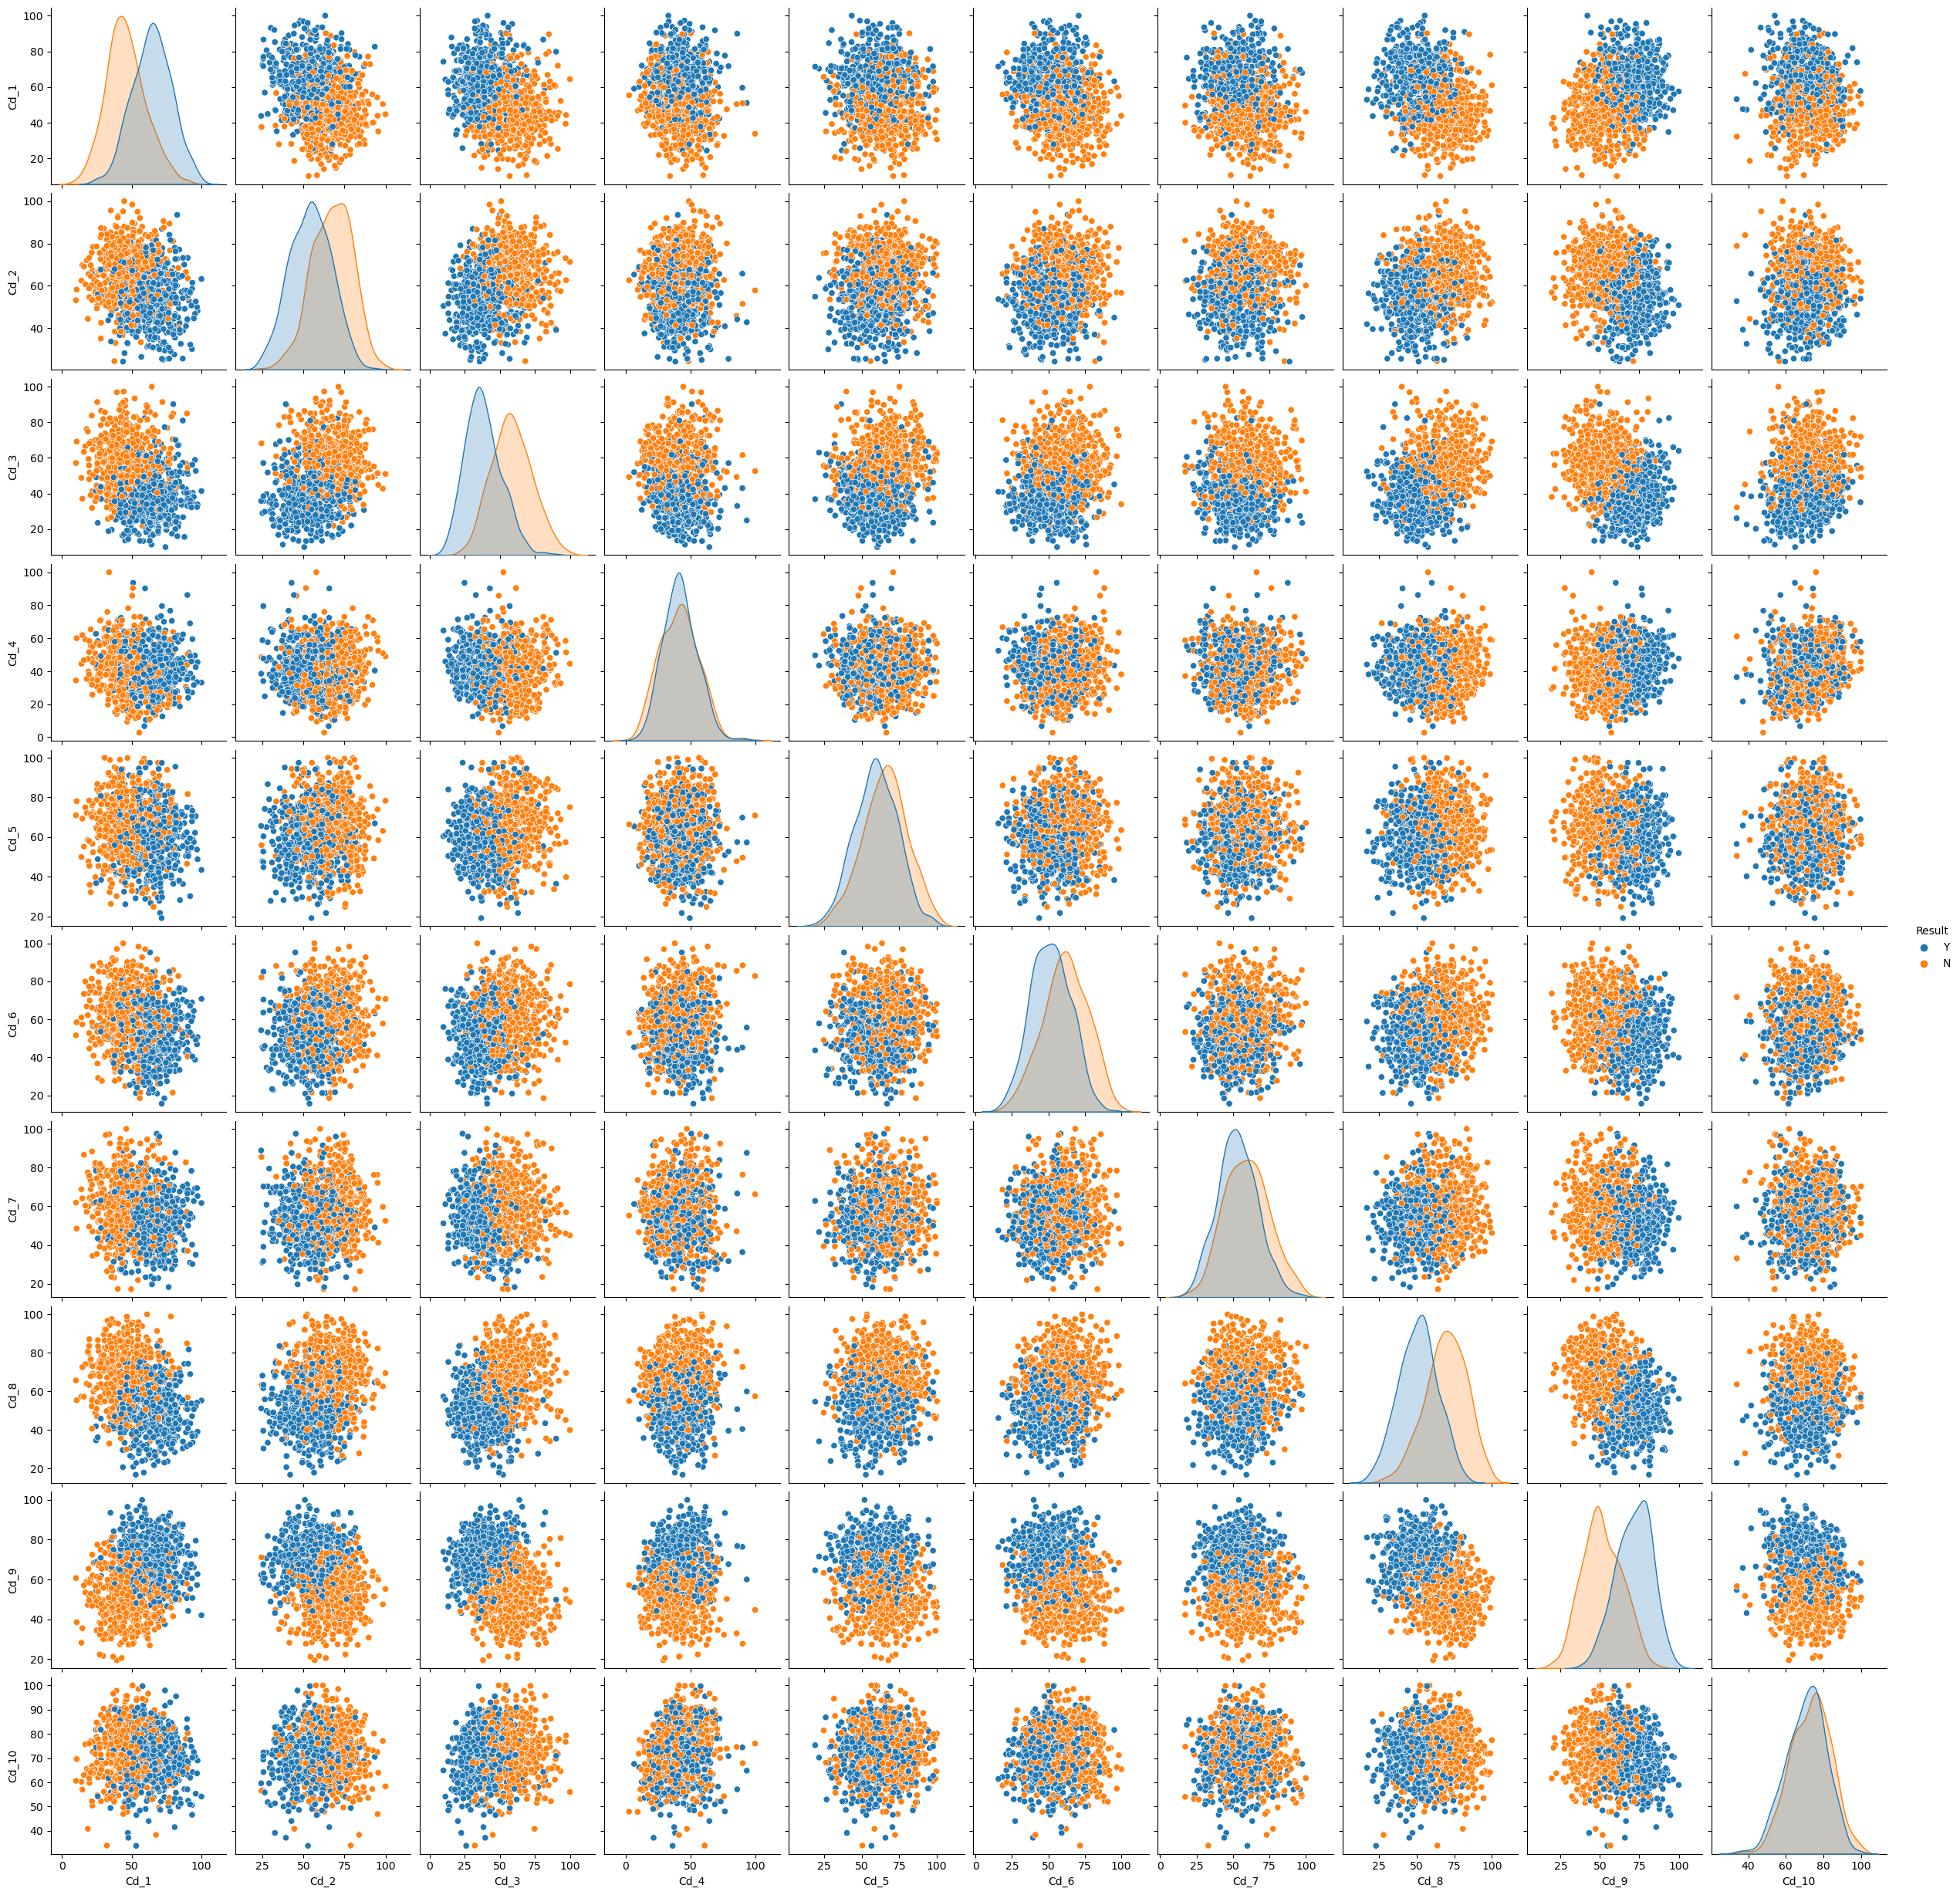

In [6]:
sns.pairplot(df, hue='Result')

In [7]:
# importing
from sklearn.preprocessing import StandardScaler
# creating instance 'scaler'
sc = StandardScaler()

In [8]:
# features independent/dependent
x = df.drop('Result',axis=1)
y = df['Result']

In [9]:
x

Cd_1  Cd_2  Cd_3  Cd_4  Cd_5  Cd_6  Cd_7  Cd_8  Cd_9  Cd_10
1     53.1  63.4  33.0  46.2  47.3  21.2  44.3  36.1  46.6   65.0
2     36.9  54.7  31.1  50.5  56.0  38.9  39.4  56.8  33.0   78.8
3     41.9  65.5  53.5  52.3  92.5  43.2  94.9  64.7  50.8   67.9
4     71.7  75.6  37.9  50.5  69.2  52.5  82.3  77.3  80.8   60.9
5     74.3  51.8  36.4  40.9  74.7  42.2  65.1  36.2  77.6   74.9
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
996   58.7  56.4  49.5  38.1  62.8  35.2  43.6  17.9  59.3   71.2
997   33.4  52.1  54.7  48.5  85.7  76.2  61.6  40.0  50.8   87.8
998   66.0  53.6  45.4  56.1  54.6  53.1  22.6  21.8  48.8   73.2
999   63.0  47.0  23.6  40.7  97.5  56.6  50.0  59.4  67.7   62.7
1000  48.6  52.4  24.2  48.9  56.6  25.5  45.4  50.9  66.7   72.1

[1000 rows x 10 columns]

In [10]:
y

1       Y
2       N
3       N
4       Y
5       Y
       ..
996     Y
997     N
998     Y
999     Y
1000    Y
Name: Result, Length: 1000, dtype: object

In [11]:
sc.fit(x)

StandardScaler()

In [12]:
scaled_x =sc.transform(x)

In [13]:
type(scaled_x)

numpy.ndarray

In [14]:
#scaled_x is a NumPy array, Let's convert this into the pandas DataFrame!
#We can use our df.columns to get the columns name and pass that to DatFrame() along with scaled_x

In [15]:
cols = df.columns[:-1]

In [16]:
df_x = pd.DataFrame(scaled_x,columns=cols)

In [17]:
df_x.head()

Cd_1      Cd_2      Cd_3      Cd_4      Cd_5      Cd_6      Cd_7  \
0 -0.122525  0.187569 -0.911832  0.318653 -1.035516 -2.305940 -0.801865   
1 -1.086028 -0.433403 -1.024151  0.624941 -0.445471 -1.153296 -1.131088   
2 -0.788651  0.337459  0.300034  0.753154  2.030007 -0.873275  2.597862   
3  0.983718  1.058359 -0.622166  0.624941  0.449771 -0.267648  1.751290   
4  1.138354 -0.640394 -0.710839 -0.058864  0.822788 -0.938396  0.595651   

       Cd_8      Cd_9     Cd_10  
0 -1.480070 -0.952562 -0.645366  
1 -0.200556 -1.826218  0.635103  
2  0.287761 -0.682756 -0.376282  
3  1.066595  1.244427 -1.025795  
4 -1.473889  1.038861  0.273232

In [18]:
x = df_x
y=y

In [19]:
#Our data is ready for the Machine Learning part now!
#Let's do the train_test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 700 rows
Test Set: 300 rows


In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [21]:
# Model training
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
# Model testing
y_pred = KNN.predict(x_test)

In [23]:
y_pred

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N

In [24]:
y_test

522    N
738    Y
741    Y
661    Y
412    N
      ..
469    Y
936    Y
429    N
8      N
156    N
Name: Result, Length: 300, dtype: object

In [25]:
comparison = pd.DataFrame()

In [26]:
comparison['Actual'] = y_test
comparison['Predicted']  = y_pred

In [27]:
comparison

Actual Predicted
522      N         N
738      Y         Y
741      Y         Y
661      Y         Y
412      N         N
..     ...       ...
469      Y         Y
936      Y         Y
429      N         N
8        N         N
156      N         N

[300 rows x 2 columns]

In [28]:
# Evaluation
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,y_pred)

array([[135,   7],
       [ 11, 147]], dtype=int64)

<Axes: >

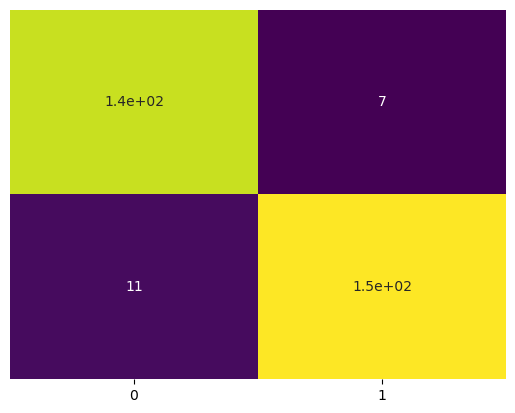

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,yticklabels=False,cbar=False,cmap='viridis')

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.92      0.95      0.94       142
           Y       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [34]:
# 94% Accuracy

In [35]:
# Testing new data
y_pred = KNN.predict([[-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282]])

In [36]:
y_pred

array(['N'], dtype=object)

In [ ]:
# Model working perfectly

# *Pickling the model file For Deployment*

In [37]:
import pickle

In [39]:
pickle.dump(KNN,open('KNN_model.pkl','wb'))

In [40]:
pickled_model=pickle.load(open('KNN_model.pkl','rb'))

In [41]:
pickled_model.predict([[-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282]])

array(['N'], dtype=object)